Written by- Asif Rana, Student ID- 102866893

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [2]:
# Importing the csv data files 
data = pd.read_csv('COS80026_Assignment1_creditcard.csv',error_bad_lines=False, warn_bad_lines=True)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking if there is any values in the class column other than 0 and 1
data.Class.unique()

array([0, 1], dtype=int64)

In [5]:
# General information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Function which counts the number of null values for each column
def count_null_values(dataset, column_list):
    for i in range (len(column_list)):
        print ("The total number of null values in :",column_list[i])
        print (dataset[column_list[i]].isnull().sum())
    return

# Matching whether there is any null values
count_null_values(data, data.columns)

The total number of null values in : Time
0
The total number of null values in : V1
0
The total number of null values in : V2
0
The total number of null values in : V3
0
The total number of null values in : V4
0
The total number of null values in : V5
0
The total number of null values in : V6
0
The total number of null values in : V7
0
The total number of null values in : V8
0
The total number of null values in : V9
0
The total number of null values in : V10
0
The total number of null values in : V11
0
The total number of null values in : V12
0
The total number of null values in : V13
0
The total number of null values in : V14
0
The total number of null values in : V15
0
The total number of null values in : V16
0
The total number of null values in : V17
0
The total number of null values in : V18
0
The total number of null values in : V19
0
The total number of null values in : V20
0
The total number of null values in : V21
0
The total number of null values in : V22
0
The total number of

In [7]:
# Dropping the duplicate values
data_clean = data.drop_duplicates() 
# some null values have been removed from 284807 records to 283726 records

In [8]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

Checking if there is any negative value for time and amount

In [9]:
data_clean['Time'].min()

0.0

In [10]:
data_clean['Amount'].min()

0.0

## Data Vizualization

## Distribution of the Class values

In [11]:
temp1 = data_clean.loc[data_clean['Class'] == 0]
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283253 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283253 non-null  float64
 1   V1      283253 non-null  float64
 2   V2      283253 non-null  float64
 3   V3      283253 non-null  float64
 4   V4      283253 non-null  float64
 5   V5      283253 non-null  float64
 6   V6      283253 non-null  float64
 7   V7      283253 non-null  float64
 8   V8      283253 non-null  float64
 9   V9      283253 non-null  float64
 10  V10     283253 non-null  float64
 11  V11     283253 non-null  float64
 12  V12     283253 non-null  float64
 13  V13     283253 non-null  float64
 14  V14     283253 non-null  float64
 15  V15     283253 non-null  float64
 16  V16     283253 non-null  float64
 17  V17     283253 non-null  float64
 18  V18     283253 non-null  float64
 19  V19     283253 non-null  float64
 20  V20     283253 non-null  float64
 21  V21     28

In [12]:
temp2 = data_clean.loc[data_clean['Class'] == 1]
temp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    473 non-null    float64
 1   V1      473 non-null    float64
 2   V2      473 non-null    float64
 3   V3      473 non-null    float64
 4   V4      473 non-null    float64
 5   V5      473 non-null    float64
 6   V6      473 non-null    float64
 7   V7      473 non-null    float64
 8   V8      473 non-null    float64
 9   V9      473 non-null    float64
 10  V10     473 non-null    float64
 11  V11     473 non-null    float64
 12  V12     473 non-null    float64
 13  V13     473 non-null    float64
 14  V14     473 non-null    float64
 15  V15     473 non-null    float64
 16  V16     473 non-null    float64
 17  V17     473 non-null    float64
 18  V18     473 non-null    float64
 19  V19     473 non-null    float64
 20  V20     473 non-null    float64
 21  V21     473 non-null    float64
 2

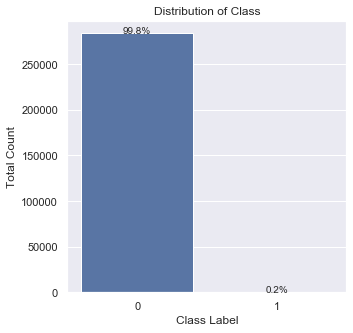

In [13]:
# Visualization of Column- Marital Status
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Class',  data=data_clean)
ax.set(title = "Distribution of Class", xlabel="Class Label", ylabel = "Total Count")
total = float(len(data_clean))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()



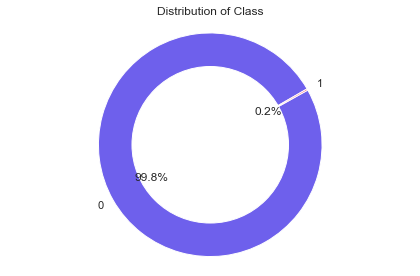

In [14]:
# Displaying the distribution of Marital Status in a Pie chart
labels = data_clean['Class'].unique()
sizes = [99.98,  0.2]
#colors
colors = ['#6E60EC','#F21F3B']
 
plt.rcParams.update({'font.size': 12})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of Class")
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

## Comparing the Median of the amount of transactions between the classes

In [15]:
mean_normal = data_clean.loc[data_clean['Class'] == 0]
mean_normal = mean_normal['Amount'].mean()
mean_normal

88.41357475466688

In [16]:
median_normal = data_clean.loc[data_clean['Class'] == 0]
median_normal = median_normal['Amount'].median()
median_normal

22.0

In [17]:
mean_fraud = data_clean.loc[data_clean['Class'] == 1]
mean_fraud = mean_fraud['Amount'].mean()
mean_fraud

123.87186046511626

In [18]:
median_fraud = data_clean.loc[data_clean['Class'] == 1]
median_fraud = median_fraud['Amount'].median()
median_fraud

9.82

In [19]:
d = {'Median': [  22, 9.82], 'Mean': [ 88.41, 123.87], 'Class': ["Not Fraud", 'Fraud']}
df = pd.DataFrame(data=d)

In [20]:
df

,Median,Mean,Class
0,22.00,88.41,Not Fraud
1,9.82,123.87,Fraud


Text(0, 0.5, 'Amount')

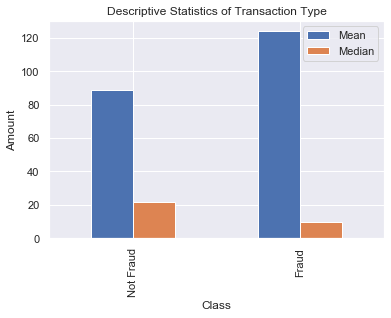

In [21]:
ax = df.plot(x="Class", y=["Mean", "Median"], kind="bar", title = "Descriptive Statistics of Transaction Type")
ax.set_ylabel("Amount")

## Identifying Seasonality in Fraudulent Transaction

In [25]:
time_hour = data_clean['Time'].to_numpy()

In [22]:
fraud_df = data_clean.loc[data_clean['Class'] == 1]

In [23]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    473 non-null    float64
 1   V1      473 non-null    float64
 2   V2      473 non-null    float64
 3   V3      473 non-null    float64
 4   V4      473 non-null    float64
 5   V5      473 non-null    float64
 6   V6      473 non-null    float64
 7   V7      473 non-null    float64
 8   V8      473 non-null    float64
 9   V9      473 non-null    float64
 10  V10     473 non-null    float64
 11  V11     473 non-null    float64
 12  V12     473 non-null    float64
 13  V13     473 non-null    float64
 14  V14     473 non-null    float64
 15  V15     473 non-null    float64
 16  V16     473 non-null    float64
 17  V17     473 non-null    float64
 18  V18     473 non-null    float64
 19  V19     473 non-null    float64
 20  V20     473 non-null    float64
 21  V21     473 non-null    float64
 2

In [26]:
time_hour

array([0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.72788e+05,
       1.72788e+05, 1.72792e+05])

In [27]:
def convert_seconds_to_hours(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] =  values[i] // (3600)
    return output
        
time_hour_24 = convert_seconds_to_hours(time_hour)

In [28]:
time_hour_24.max()

47.0

In [29]:
time_hour_24.min()

0.0

In [30]:
data_clean['Time in hours'] = time_hour_24.tolist()


C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time in hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [32]:
data_clean.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time in hours
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,47.0


## Transactions per Hour

(10, 2000)

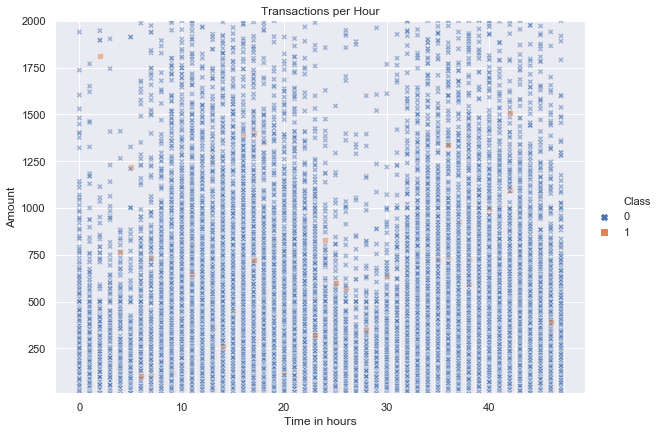

In [36]:
sns.relplot(x="Time in hours", y="Amount", hue="Class", style="Class", aspect=11.7/8.27,
             alpha=.5, palette="deep",  markers={1: "s", 0: "X"},
            height=6, data=data_clean).set(title='Transactions per Hour')
plt.ylim(10, 2000)

## Correlation Between Features

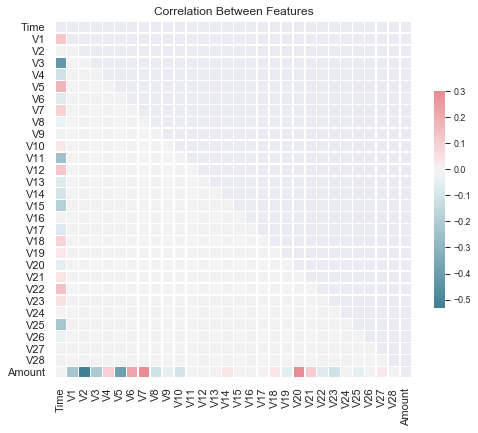

In [37]:
# Compute the correlation matrix
corr = data_clean.drop(columns = ['Class', 'Time in hours']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12, "axes.labelsize":12}) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Between Features')
plt.show()

# Model Building

### Data Preprocessing

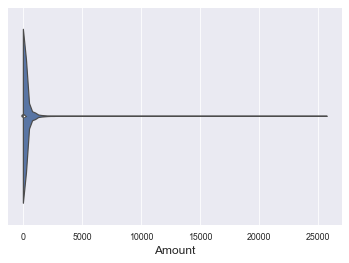

In [38]:
# Amount is heavily positively skewed which needs normalization
ax = sns.violinplot(x=data_clean["Amount"])

### Using Robust Sclaer to scale the Amount feature

In [39]:
# Robust scaler is used as the normalizer
data_norm = data_clean
robust_scaler = RobustScaler()

amount = data_clean['Amount'].to_numpy()
data_norm['Scaled Amount'] = robust_scaler.fit(amount.reshape(-1, 1)).transform(amount.reshape(-1, 1))

data_norm.head()

C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time in hours,Scaled Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,1.774718
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,-0.268530
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,4.959811
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,1.411487
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.667362


In [40]:
data_norm = data_norm.drop(columns = ['Amount', 'Time'])

In [41]:
data_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time in hours,Scaled Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0,1.774718
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0,-0.268530
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0,4.959811
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0,1.411487
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0,0.667362


## Implementing Downsampling

In [42]:
print(len(data_norm[data_norm['Class'] == 0]))
print(len(data_norm[data_norm['Class'] == 1]))

283253
473


In [43]:
# Dataset with 'yes' as the classifier value
minor_class_index = data_norm[data_norm['Class'] == 1].index

# Dataset with 'no' as the classifier value
major_class_index = data_norm[data_norm['Class'] == 0].index


# Appling down sampling
down_sample_major_index = np.random.choice(major_class_index, len(minor_class_index), replace = False)

balanced_indices = np.concatenate([ minor_class_index, down_sample_major_index])

# Getting the balanced dataset
balanced_dataset = data_norm.loc[balanced_indices]
balanced_dataset.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time in hours,Scaled Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,0.0,-0.305938
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,0.0,7.050480
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,1.0,3.030594
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,1.0,0.514532
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,2.0,-0.292032


In [44]:
balanced_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time in hours,Scaled Amount
133892,-0.193873,-0.433502,1.453415,-2.371041,-1.001338,-1.144998,-0.289604,-0.084443,-2.082458,0.865189,...,-0.075471,-0.029022,0.311409,-0.417325,-0.423090,0.135741,0.147168,0,22.0,-0.236407
75604,-3.466512,-2.126557,0.423966,-1.387232,0.427631,1.065076,-1.042606,1.549388,0.818709,-2.158936,...,1.389024,0.305194,-1.276295,-0.239174,-0.618960,0.167951,-0.635118,0,15.0,0.667501
89494,1.261663,0.187745,0.493647,0.628102,-0.558169,-1.012435,-0.000540,-0.153880,0.182020,-0.038791,...,-0.818594,0.147576,0.349989,0.187830,0.097981,-0.034789,0.016882,0,17.0,-0.293561
59819,1.320721,-0.453119,0.419752,-0.495867,-1.074345,-0.984800,-0.382071,-0.183652,-0.969384,0.654117,...,-0.418776,0.138920,0.635087,0.129090,1.037295,-0.049049,0.006878,0,13.0,-0.166875
209787,1.129706,-1.207823,-2.350405,1.656583,0.024243,-1.347598,1.436114,-0.634697,-0.126660,0.165536,...,0.167882,-0.434681,0.056208,0.275236,-0.536987,-0.127507,0.020262,0,38.0,6.523432


In [45]:
balanced_dataset.shape

(946, 31)

## Creating Test & Train Dataset 

In [46]:
# Splitting the dataset into classifier and non-classifier columns
X = balanced_dataset.drop('Class', axis=1).values
y = balanced_dataset['Class'].values

# Train- 75%, Test-25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, train_size=0.75, random_state=42)

In [47]:
X_train.shape

(709, 30)

In [48]:
X_test.shape

(237, 30)

In [49]:
y_train.shape

(709,)

In [50]:
y_test.shape

(237,)

## Classification of Models

In [51]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_jobs = -1, random_state= 42)
# Parameter for performing hyper tuning
parameters = {'n_estimators': [3, 4, 5], 'max_depth': [4, 6, 8], \
              'min_samples_split': [40, 60, 80], 'max_leaf_nodes': [6, 10, 15]}

rfc = GridSearchCV(random_forest, parameters,  cv = 5)

rfc.fit(X_train, y_train)
print(rfc.best_params_)
print(rfc.best_score_)

predict = rfc.predict(X_test)

# Getting the accuracy metric
acc = accuracy_score(predict, y_test)
pre = precision_score(predict, y_test)
rec = recall_score(predict, y_test)
f1 = f1_score(predict, y_test)

print('Model Performance Statistic: ')
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ',rec)
print('F1 Score: ', f1)
print('Confusion Metrix:')
print(confusion_matrix(y_test, predict))

{'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_split': 40, 'n_estimators': 4}
0.913964638897213
Model Performance Statistic: 
Accuracy:  0.9240506329113924
Precision:  0.9217391304347826
Recall:  0.9217391304347826
F1 Score:  0.9217391304347826
Confusion Metrix:
[[113   9]
 [  9 106]]


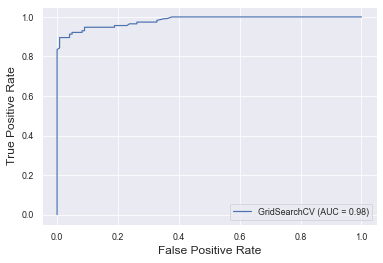

In [52]:
metrics.plot_roc_curve(rfc, X_test, y_test)  
plt.show()                                  

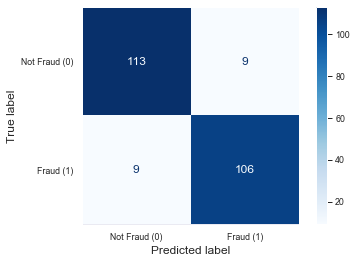

In [53]:
class_names = ['Not Fraud (0)', 'Fraud (1)']
plot_confusion_matrix(rfc, X_test, y_test, display_labels=class_names,
                                 cmap=plt.cm.Blues,values_format = '1.0f')  
plt.grid(False)
plt.show()  

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [2,3,4]}


neigh = KNeighborsClassifier()

knc = GridSearchCV(neigh, parameters,  cv = 5)

knc.fit(X_train, y_train)
print(knc.best_params_)
print(knc.best_score_)

predict = knc.predict(X_test)

# Getting the accuracy metric
acc = accuracy_score(predict, y_test)
pre = precision_score(predict, y_test)
rec = recall_score(predict, y_test)
f1 = f1_score(predict, y_test)

print('Model Performance Statistic: ')
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ',rec)
print('F1 Score: ', f1)
print('Confusion Metrix:')
print(confusion_matrix(y_test, predict))

{'n_neighbors': 3}
0.9153830786135252
Model Performance Statistic: 
Accuracy:  0.9451476793248945
Precision:  0.9304347826086956
Recall:  0.9553571428571429
F1 Score:  0.9427312775330396
Confusion Metrix:
[[117   5]
 [  8 107]]


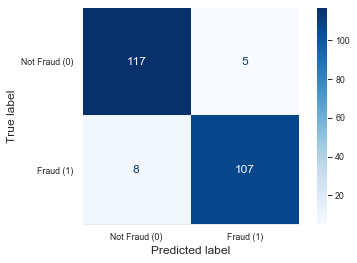

In [55]:
class_names = ['Not Fraud (0)', 'Fraud (1)']
plot_confusion_matrix(knc, X_test, y_test, display_labels=class_names,
                                 cmap=plt.cm.Blues,values_format = '1.0f')  
plt.grid(False)
plt.show()  

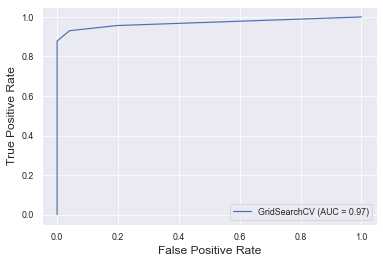

In [56]:
metrics.plot_roc_curve(knc, X_test, y_test)  
plt.show()                                  